# Veri Yükleme, Depolama ve Dosya Biçimleri

# 6.1 Metin Biçiminde Veri Okuma ve Yazma
    pandas, tablo şeklindeki verileri bir DataFrame nesnesi olarak okumak için bir dizi fonksiyon içerir.

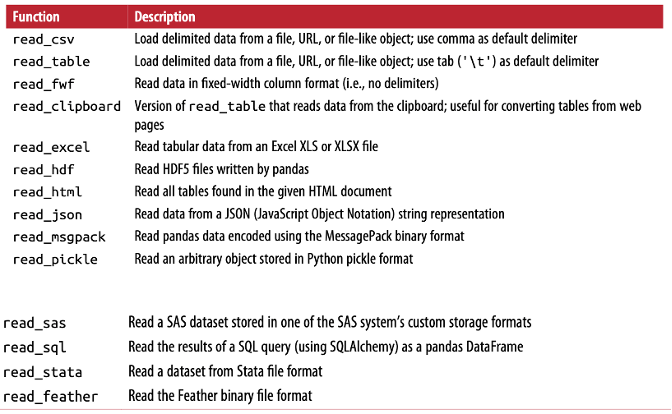

In [1]:
from IPython.display import Image
Image("img/picture42.png")

    Metin verilerini bir DataFrame'e dönüştürmeyi amaçlayan bu fonksiyonlar, isteğe bağlı argümanlar birkaç kategoriye ayrılabilir.

1)Endeksleme
    Bir veya daha fazla sütunu döndürülen DataFrame olarak ve dosyadan, kullanıcıdan sütun adlarının alınıp alınmayacağını veya hiç almayacağını kabul edebilir.
    
2)Tür çıkarımı ve veri dönüştürme
    Bu, kullanıcı tanımlı değer dönüşümlerini ve eksik değer işaretçilerinin özel listesini içerir.
    
3)Tarih saat ayrıştırma
    Birden çok sütuna yayılmış tarih ve saat bilgilerinin sonuçtaki tek bir sütunda birleştirilmesi dahil olmak üzere birleştirme özelliğini içerir.
    
4)Yinelemek
    Çok büyük dosyaların yığınlarını yineleme desteği.
    
5)Temiz olmayan veri sorunları
    Binlerce virgülle ayrılmış sayısal veriler gibi satırları veya altbilgiyi, yorumları veya diğer küçük şeyleri atlama.

    Gerçek dünyadaki verilerin dağınık olabileceğinden dolayı, veri yükleme fonksiyonlarından bazıları (özellikle read_csv) zaman içinde çok karmaşık hale geldi.

    Pandas.read_csv gibi bu işlevlerden bazıları tür çıkarımı gerçekleştirir, çünkü sütun veri türleri veri biçiminin bir parçası değildir. Bu, hangi sütunların sayısal, tam sayı, boolen veya dize olduğunu belirtmeniz gerekmediği anlamına gelir. HDF5, Feather ve msgpack gibi diğer veri formatları, formatta depolanan veri türlerine sahiptir.

    Tarihleri ve diğer özel türleri işlemek ekstra çaba gerektirebilir. Virgülle ayrılmış (CSV) metin dosyasını ele alaım.

In [2]:
 !cat ch06/ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

    Dosya virgülle ayrılmış olduğundan, bunu bir DataFrame'e okumak için read_csv'yi kullanabiliriz.

In [3]:
import pandas as pd
df = pd.read_csv('ch06/ex1.csv')

In [4]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


    Ayrıca read_table kullanabilir ve sınırlayıcıyı belirleyebilirsiniz.

In [5]:
pd.read_table('ch06/ex1.csv', sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


    Bir dosyanın her zaman bir başlık satırı olmayacaktır. Bu dosyayı düşünün:

In [6]:
!cat ch06/ex2.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

    Bu dosyayı okumak için birkaç seçenek vardır. Pandas varsayılan sütun adları atamasına izin verebilir veya adları kendiniz belirtebilirsiniz.

In [7]:
pd.read_csv('ch06/ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [8]:
pd.read_csv('ch06/ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


    İleti sütununun döndürülen DataFrame'in dizini olmasını istediğinizi varsayalım. Sütunu dizin 4'te istediğinizi belirtebilir veya dizin_kol değişkenini kullanarak 'ileti' olarak adlandırabilirsiniz.

In [9]:
names = ['a', 'b', 'c', 'd', 'message']

In [10]:
pd.read_csv('ch06/ex2.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


    Birden çok sütundan hiyerarşik bir dizin oluşturmak istemeniz durumunda, sütun numaraları veya adların bir listesini iletin.

In [11]:
!cat ch06/csv_mindex.csv

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [12]:
parsed = pd.read_csv('ch06/csv_mindex.csv',
                     index_col=['key1', 'key2'])

In [13]:
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

    Bazı durumlarda, bir tablonun alanları ayırmak için beyaz boşluk veya başka bir kalıp kullanan sabit bir sınırlayıcısı olmayabilir. Şuna benzeyen bir metin dosyası düşünün:

In [14]:
list(open('ch06/ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

    El ile biraz kesme yapabilirsiniz, ancak buradaki alanlar değişken miktarda boşlukla ayrılır. Bu durumlarda, read_table için bir ayırıcı olarak normal bir ifade iletebilirsiniz. Bu, \ s + düzenli ifadesi ile ifade edilebilir, dolayısıyla bizde:

In [15]:
result = pd.read_table('ch06/ex3.txt', sep='\s+')

In [16]:
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


    Veri satırlarının sayısından bir daha az sütun adı olduğundan, read_table bu özel durumda ilk sütunun DataFrame'in indeksi olması gerektiği sonucuna varır.

    Bir dosyanın birinci, üçüncü ve dördüncü satırlarını skiprows ile atlayabilirsiniz.

In [17]:
!cat ch06/ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo

In [18]:
pd.read_csv('ch06/ex4.csv', skiprows=[0, 2, 3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


    Eksik değerlerin ele alınması, dosya ayrıştırma işleminin önemli ve sıklıkla nüanslı bir parçasıdır. Eksik veriler genellikle mevcut değildir (boş dizedir) veya bazı gözlemci değerlerle işaretlenir. Pandas, varsayılan olarak NA ve NULL gibi yaygın olarak ortaya çıkan bir dizi nöbetçi kullanır.

In [19]:
!cat ch06/ex5.csv

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo

In [20]:
result = pd.read_csv('ch06/ex5.csv')

In [21]:
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [22]:
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


    Na_values seçeneği, eksik değerleri göz önünde bulundurmak için bir liste veya dize kümesini alabilir.

In [23]:
result = pd.read_csv('ch06/ex5.csv', na_values=['NULL'])

In [24]:
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


    Bir diktedeki her sütun için farklı NA nöbetçileri belirlenebilir.

In [25]:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}

In [26]:
pd.read_csv('ch06/ex5.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


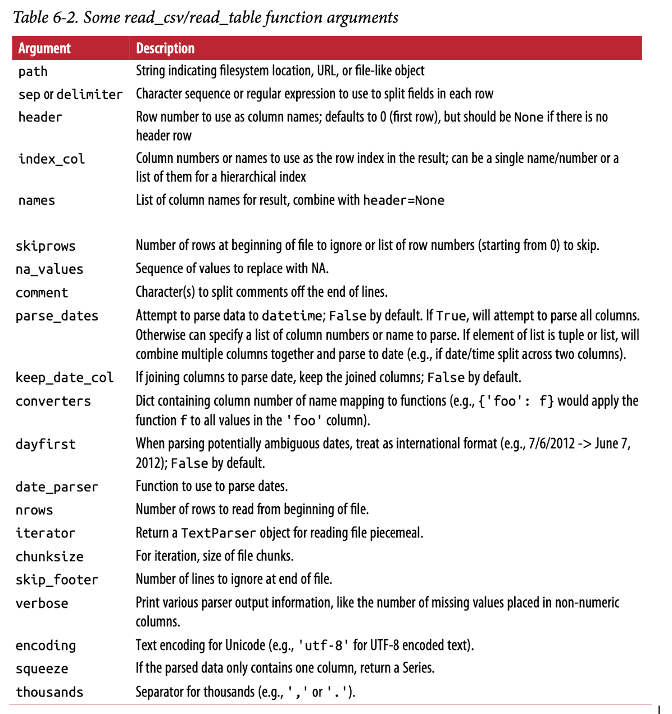

In [27]:
Image("img/picture43.png")

    1)Metin Dosyalarını Parçalar Halinde Okuma
    
        Çok büyük dosyaları işlerken veya büyük bir dosyayı doğru bir şekilde işlemek için doğru argümanlar setini bulurken, dosyanın yalnızca küçük bir parçasını okumak veya dosyanın daha küçük parçalarını yinelemek isteyebilirsiniz.
        Büyük bir dosyaya bakmadan önce, pandas görüntü ayarlarını daha kompakt hale getiriyoruz.

In [28]:
pd.options.display.max_rows = 10

In [29]:
result = pd.read_csv('ch06/ex6.csv')

In [30]:
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


    Yalnızca az sayıda satırı okumak istiyorsanız (tüm dosyayı okumaktan kaçınmak), bunu sayılarla belirtin.

In [31]:
pd.read_csv('ch06/ex6.csv', nrows=5)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


    Bir dosyayı parçalar halinde okumak için, bir yığın boyutunu birkaç satır olarak belirtin.

In [32]:
chunker = pd.read_csv('ch06/ex6.csv', chunksize=1000)

In [33]:
chunker

    Read_csv tarafından döndürülen TextParser nesnesi, yığın boyutuna göre dosyanın bölümleri üzerinde yineleme yapmanıza olanak tanır. Örneğin, ex6.csv üzerinde yineleme yapabiliriz, 'anahtar' sütunundaki değer sayılarını şu şekilde toplayabiliriz:

In [34]:
chunker = pd.read_csv('ch06/ex6.csv', chunksize=1000)

    tot = pd.Series([],dtype=pd.StringDtype()) 
    for piece in chunker:
            tot = tot.add(piece['key'].value_counts(), fill_value=0)
    tot = tot.sort_values(ascending=False)

In [37]:
tot[:10]

Series([], dtype: string)

    TextParser ayrıca rastgele boyuttaki parçaları okumanızı sağlayan bir get_chunk yöntemiyle donatılmıştır.

    2)Metin Formatına Veri Yazma
        Veriler ayrıca sınırlandırılmış bir biçimde dışa aktarılabilir. Daha önce okunan CSV dosyalarından birini ele alalım.

In [38]:
data = pd.read_csv('ch06/ex5.csv')

In [39]:
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


    DataFrame’in to_csv yöntemini kullanarak verileri virgülle ayrılmış bir dosyaya yazabiliriz.

In [40]:
data.to_csv('ch06/out.csv')

In [41]:
!cat ch06/out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


    Elbette diğer sınırlayıcılar da kullanılabilir (sys.stdout'a yazarak metin sonucunu konsola yazdırır).

In [42]:
import sys
data.to_csv(sys.stdout, sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


    Eksik değerler, çıktıda boş dizeler olarak görünür. Onları başka bir koruyucu değerle belirtmek isteyebilirsiniz.

In [43]:
data.to_csv(sys.stdout, na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


    Başka seçenek belirtilmeden hem satır hem de sütun etiketleri yazılır. Bunların ikisi de devre dışı bırakılabilir.

In [44]:
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


    Ayrıca, sütunların yalnızca bir alt kümesini seçtiğiniz bir sırada yazabilirsiniz.

In [45]:
data.to_csv(sys.stdout, index=False, columns=['a', 'b', 'c'])

a,b,c
1,2,3.0
5,6,
9,10,11.0


    Serinin ayrıca bir to_csv yöntemi vardır.

In [46]:
dates = pd.date_range('1/1/2000', periods=7)

In [47]:
import numpy as np
ts = pd.Series(np.arange(7), index=dates)

In [48]:
ts.to_csv('ch06/tseries.csv')

In [49]:
!cat ch06/tseries.csv

,0
2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6


    3)Sınırlandırılmış Biçimlerle Çalışma
        Pandas.read_table gibi fonksiyonları kullanarak çoğu tablolu veri biçimini diskten yüklemek mümkündür. Ancak bazı durumlarda, bazı manuel işlemler gerekli olabilir. Read_table hatası veren bir veya daha fazla hatalı biçimlendirilmiş satır içeren bir dosya almak alışılmadık bir durum değildir.

In [50]:
!cat ch06/ex7.csv

"a","b","c"
"1","2","3"
"1","2","3","4"


    Tek karakterlik sınırlayıcıya sahip herhangi bir dosya için Python’un csv modülünü kullanabilirsiniz. Kullanmak için, herhangi bir açık dosyayı veya dosya benzeri nesneyi csv.reader'a iletin.

In [51]:
import csv
f = open('ch06/ex7.csv')
reader = csv.reader(f)

In [52]:
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3', '4']


    İlk olarak, dosyayı bir satır listesine çevirin.

In [53]:
with open('ch06/ex7.csv') as f:
    lines = list(csv.reader(f))

    Ardından satırları başlık satırına ve veri satırlarına böleriz.

In [54]:
header, values = lines[0], lines[1:]

    Sonra bir sözlük anlayışı kullanarak bir veri sütunları sözlüğü oluşturabiliriz ve satırları sütunlara dönüştüren zip (* değerler) ifadesi:

In [55]:
data_dict = {h: v for h, v in zip(header, zip(*values))}

In [56]:
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

    CSV dosyalarının birçok farklı türü vardır. Farklı bir sınırlayıcı, dize tırnaklama kuralı veya satır sonlandırıcı ile yeni bir biçim tanımlamak için, csv.Dialect'in basit bir alt sınıfını tanımlarız.

    class my_dialect(csv.Dialect):
        lineterminator = '\n'
        delimiter = ';'
        quotechar = '"'
        quoting = csv.QUOTE_MINIMAL

    reader = csv.reader(f, dialect=my_dialect)
    reader = csv.reader(f, delimiter='|')

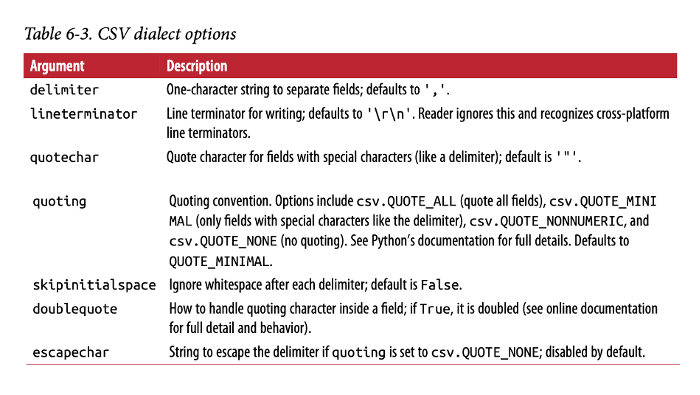

In [57]:
Image("img/picture44.png")

    Sınırlandırılmış dosyaları manuel olarak yazmak için csv.writer'ı kullanabilirsiniz. Açık, yazılabilir bir dosya nesnesini ve csv.reader ile aynı lehçe ve biçim seçeneklerini kabul eder.

    with open('mydata.csv', 'w') as f:
        writer = csv.writer(f, dialect=my_dialect)
        writer.writerow(('one', 'two', 'three'))
        writer.writerow(('1', '2', '3'))
        writer.writerow(('4', '5', '6'))
        writer.writerow(('7', '8', '9'))

    3)JSON Data
        JSON (JavaScript Object Notation'ın kısaltması), web tarayıcıları ve diğer uygulamalar arasında HTTP isteği ile veri göndermek için standart formatlardan biri haline geldi. CSV gibi tablo şeklinde bir metin biçiminden çok daha serbest biçimli bir veri biçimidir. İşte bir örnek:

In [59]:
  obj = """
    {"name": "Wes",
     "places_lived": ["United States", "Spain", "Germany"],
     "pet": null,
     "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
                  {"name": "Katie", "age": 38,
                   "pets": ["Sixes", "Stache", "Cisco"]}]
} """

    JSON, boş değeri null ve diğer bazı nüanslar (listelerin sonundaki sondaki virgüllere izin vermemek gibi) dışında neredeyse geçerli bir Python kodudur. Temel türler nesneler (dicts), diziler (listeler), dizeler, sayılar, boolean'lar ve boş değerlerdir. Bir nesnedeki tüm anahtarlar dizge olmalıdır. JSON verilerini okumak ve yazmak için birkaç Python kitaplığı vardır. Python standart kitaplığında yerleşik olduğu için burada json kullanacağız. JSON dizesini Python biçimine dönüştürmek için json.loads kullanın.

In [60]:
import json

In [61]:
result = json.loads(obj)

In [62]:
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

    Diğer yandan json.dumps, bir Python nesnesini tekrar JSON'a dönüştürür.

In [63]:
asjson = json.dumps(result)

    Analiz için bir JSON nesnesini veya nesne listesini DataFrame'e veya başka bir veri yapısına nasıl dönüştürebileceğiniz size bağlıdır. Elverişli olarak, DataFrame yapıcısına bir dikt listesi (önceden JSON nesneleri idi) geçirebilir ve veri alanlarının bir alt kümesini seçebilirsiniz.

In [64]:
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age'])

In [65]:
siblings

,name,age
0,Scott,30
1,Katie,38


    Pandas.read_json, belirli düzenlemelerdeki JSON veri kümelerini otomatik olarak Seri veya Veri Çerçevesine dönüştürebilir. Örneğin:

    !cat ch06/example.json
    [{"a": 1, "b": 2, "c": 3},
         {"a": 4, "b": 5, "c": 6},
         {"a": 7, "b": 8, "c": 9}]

    Pandas.read_json için varsayılan seçenekler, JSON dizisindeki her nesnenin tablodaki bir satır olduğunu varsayar.

    data = pd.read_json('ch06/example.json')
      data
        a b c
      0 1 2 3 
      1 4 5 6
      2 7 8 9

    Pandas'tan JSON'a veri aktarmanız gerekiyorsa, bunun bir yolu Series ve DataFrame'de to_json yöntemlerini kullanmaktır.

In [66]:
print(data.to_json())

{"something":{"0":"one","1":"two","2":"three"},"a":{"0":1,"1":5,"2":9},"b":{"0":2,"1":6,"2":10},"c":{"0":3.0,"1":null,"2":11.0},"d":{"0":4,"1":8,"2":12},"message":{"0":null,"1":"world","2":"foo"}}


In [67]:
print(data.to_json(orient='records'))

[{"something":"one","a":1,"b":2,"c":3.0,"d":4,"message":null},{"something":"two","a":5,"b":6,"c":null,"d":8,"message":"world"},{"something":"three","a":9,"b":10,"c":11.0,"d":12,"message":"foo"}]


    4)XML and HTML: Web Scraping
        Python, her yerde bulunan HTML ve XML formatlarında veri okumak ve yazmak için birçok kitaplığa sahiptir. Örnekler arasında lxml, Beautiful Soup ve html5lib bulunur. Genel olarak lxml nispeten daha hızlı olsa da, diğer kitaplıklar hatalı biçimlendirilmiş HTML veya XML dosyalarını daha iyi işleyebilir.

    Pandas, HTML dosyalarındaki tabloları otomatik olarak DataFrame nesneleri olarak ayrıştırmak için lxml ve Beautiful Soup gibi kitaplıkları kullanan bir read_html fonksiyona sahiptir.

    Pandas.read_html işlevinin bir dizi seçeneği vardır, ancak varsayılan olarak <table> etiketlerinde bulunan tüm tablo verilerini arar ve ayrıştırmaya çalışır. Sonuç, DataFrame nesnelerinin bir listesidir.

In [ ]:
!conda install lxml

Solving environment: done

## Package Plan ##

  environment location: /Users/veyseldogan/opt/anaconda3

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       h033912b_0         138 KB  conda-forge
    certifi-2020.12.5          |   py38h50d1736_0         143 KB  conda-forge
    lxml-4.6.2                 |   py38h249bda7_0         1.2 MB  conda-forge
    openssl-1.1.1h             |       haf1e3a3_0         1.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.4 MB

The following packages will be UPDATED:

  ca-certificates    anaconda::ca-certificates-2020.10.14-0 --> conda-forge::ca-certificates-2020.12.5-h033912b_0
  certifi                anaconda::certifi-2020.6.20-py38_0 --> conda-forge::certifi-2020.12.5-py38h50d1736_0

The 

In [ ]:
!pip install beautifulsoup4 html5lib

In [ ]:
!pip install lxml

In [ ]:
import pandas as pd
tables = pd.read_html('examples/fdic_failed_bank_list.html')

In [ ]:
len(tables)

In [ ]:
failures = tables[0]

In [ ]:
failures.head()

    Hataların birçok sütunda olduğundan, pandas bir satır sonu karakteri ekler \.

In [ ]:
close_timestamps = pd.to_datetime(failures['Closing Date'])

In [ ]:
close_timestamps.dt.year.value_counts()

    1)XML'i lxml.objectify ile ayrıştırma
        XML (eXtensible Markup Language) hiyerarşik, iç içe geçmiş verileri meta verilerle destekleyen başka bir yaygın yapılandırılmış veri formatıdır. Şu anda okuduğunuz kitap aslında bir dizi büyük XML belgeden oluşturulmuştur.

    <INDICATOR> <INDICATOR_SEQ>373889</INDICATOR_SEQ> <PARENT_SEQ></PARENT_SEQ>
    MemphisTN 9956 Milwaukee WI 20364
    Acquiring Institution
             Today's Bank  September 23, 2016  November 17, 2016
    Closing Date       Updated Date
    <AGENCY_NAME>Metro-North Railroad</AGENCY_NAME>
    <INDICATOR_NAME>Escalator Availability</INDICATOR_NAME>
    <DESCRIPTION>Percent of the time that escalators are operational
    systemwide. The availability rate is based on physical observations performed the morning of regular business days only. This is a new indicator the agency began reporting in 2009.</DESCRIPTION>
    <PERIOD_YEAR>2011</PERIOD_YEAR> <PERIOD_MONTH>12</PERIOD_MONTH> <CATEGORY>Service Indicators</CATEGORY> <FREQUENCY>M</FREQUENCY> <DESIRED_CHANGE>U</DESIRED_CHANGE> <INDICATOR_UNIT>%</INDICATOR_UNIT> <DECIMAL_PLACES>1</DECIMAL_PLACES> <YTD_TARGET>97.00</YTD_TARGET> <YTD_ACTUAL></YTD_ACTUAL> <MONTHLY_TARGET>97.00</MONTHLY_TARGET> <MONTHLY_ACTUAL></MONTHLY_ACTUAL>
        </INDICATOR>

    New York Metropolitan Transportation Authority (MTA) otobüs ve tren hizmetleri hakkında bir dizi veri dizisi yayınlıyor. Burada, bir dizi XML dosyasında bulunan performans verilerine bakacağız. Her tren veya otobüs hizmetinin, aşağıdaki gibi görünen bir dizi XML kaydı olarak aylık verileri içeren farklı bir dosyası (Metro-Kuzey Demiryolu için Performance_MNR.xml gibi) vardır:

    Lxml.objectify kullanarak, dosyayı ayrıştırır ve getroot ile XML dosyasının kök düğümüne bir referans alırız.

In [ ]:
from lxml import objectify

In [ ]:
path = 'datasets/mta_perf/Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()

    root.INDICATOR, her <INDICATOR> XML öğesini veren bir oluşturucu döndürür. Her kayıt için, veri değerlerine (birkaç etiket hariç) bir etiket adı diktesi (YTD_ACTUAL gibi) yerleştirebiliriz.

In [ ]:
data = []

skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ',
                   'DESIRED_CHANGE', 'DECIMAL_PLACES']

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren(): 
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

    Son olarak, bu dicts listesini bir DataFrame'e dönüştürün.

In [ ]:
perf = pd.DataFrame(data)

In [ ]:
perf.head()

    XML verileri bu örnekten çok daha karmaşık hale gelebilir. Her etiketin meta verileri de olabilir. Aynı zamanda geçerli XML olan bir HTML bağlantı etiketi düşünün.

In [ ]:
from io import StringIO
tag = '<a href="http://www.google.com">Google</a>' 
root = objectify.parse(StringIO(tag)).getroot()

    Artık etiket veya bağlantı metnindeki herhangi bir alana (href gibi) erişebilirsiniz.

In [ ]:
root

In [ ]:
root.get('href')

In [ ]:
root.text

# 6.2 İkili Veri Formatları

    Verileri (serileştirme olarak da bilinir) verimli bir şekilde ikili biçimde depolamanın en kolay yollarından biri Python’un built-in pickle serialization'u kullanmaktır. Pandas nesnelerinin tümü, verileri diske pickle biçiminde yazan bir to_pickle yöntemine sahiptir.

In [ ]:
frame = pd.read_csv('examples/ex1.csv')

In [ ]:
frame

In [ ]:
frame.to_pickle('examples/frame_pickle')

In [ ]:
pd.read_pickle('examples/frame_pickle')

    Pandas, iki tane daha ikili veri formatı için yerleşik desteğe sahiptir: HDF5 ve Mesaj Paketi. Pandas veya NumPy verileri için diğer bazı depolama biçimleri şunları içerir:
    
    Bcolz:
    Blosc sıkıştırma kitaplığına dayalı, sıkıştırılabilir sütun yönelimli ikili biçim.
    Feather:
    R program topluluğunun Hadley Wickham'ıyla tasarladığım diller arası sütun odaklı bir dosya formatı. Tüy, Apache Arrow sütun bellek formatını kullanır.

    2)HDF5 Formatı Kullanmak
        HDF5, büyük miktarlarda bilimsel dizi verisini depolamaya yönelik, saygın bir dosya formatıdır. C kütüphanesi olarak mevcuttur ve Java, Julia, MATLAB ve Python dahil olmak üzere diğer birçok dilde kullanılabilen arayüzlere sahiptir. HDF5'teki "HDF", hiyerarşik veri formatı anlamına gelir. Her bir HDF5 dosyası birden fazla veri kümesini depolayabilir ve meta verileri destekleyebilir. Daha basit formatlarla karşılaştırıldığında HDF5, çeşitli sıkıştırma modlarıyla anında sıkıştırmayı destekler ve tekrarlanan desenlere sahip verilerin daha verimli bir şekilde depolanmasını sağlar. Çok daha büyük dizilerin küçük bölümlerini verimli bir şekilde okuyup yazabildiğiniz için, HDF5 belleğe sığmayan çok büyük veri kümeleriyle çalışmak için iyi bir seçim olabilir.

    PyTables veya h5py kitaplıklarını kullanarak HDF5 dosyalarına doğrudan erişmek mümkün olsa da pandalar, Series ve DataFrame nesnelerini depolamayı basitleştiren yüksek seviyeli bir arayüz sağlar. HDFStore sınıfı bir kural gibi çalışır ve düşük düzeyli ayrıntıları işler.

In [ ]:
!conda install pytables

In [ ]:
!pip install --user tables

In [ ]:
import numpy as np
import pandas as pd
frame = pd.DataFrame({'a': np.random.randn(100)})

In [ ]:
store = pd.HDFStore('mydata.h5')

In [ ]:
store['obj1'] = frame

In [ ]:
store['obj1_col'] = frame['a']

In [ ]:
store

    HDF5 dosyasında bulunan nesneler daha sonra aynı dikte benzeri API ile alınabilir.

In [ ]:
store['obj1']

    HDFStore, "sabit" ve "tablo" olmak üzere iki depolama şemasını destekler. İkincisi genellikle daha yavaştır, ancak özel bir sözdizimi kullanan sorgu işlemlerini destekler.

In [ ]:
store.put('obj2', frame, format='table')

In [ ]:
store.select('obj2', where=['index >= 10 and index <= 15'])

In [ ]:
store.close()

    Pandas.read_hdf işlevi, bu araçlara kısayol sağlar:

In [ ]:
frame.to_hdf('mydata.h5', 'obj3', format='table')

In [ ]:
pd.read_hdf('mydata.h5', 'obj3', where=['index < 5'])

    3)Microsoft Excel Dosyalarını Okuma
        Pandas, ExcelFile sınıfını veya pandas.read_excel işlevini kullanarak Excel 2003 (ve üstü) dosyalarında depolanan tablo verilerinin okunmasını da destekler. Dahili olarak bu araçlar, sırasıyla XLS ve XLSX dosyalarını okumak için xlrd ve openpyxl eklenti paketlerini kullanır.

In [ ]:
xlsx = pd.ExcelFile('examples/ex1.xlsx')

    Bir sayfada depolanan veriler daha sonra ayrıştırılarak DataFrame'e okunabilir.

In [ ]:
pd.read_excel(xlsx, 'Sheet1')

In [ ]:
frame = pd.read_excel('examples/ex1.xlsx', 'Sheet1')

In [ ]:
frame

    Pandas Göndermek Excel yazmak için önce bir ExcelWriter, ardından pandas nesnelerinin to_excel yöntemini kullanarak ona veri yazmanız gerekir.

In [ ]:
writer = pd.ExcelWriter('examples/ex2.xlsx')

In [ ]:
frame.to_excel(writer, 'Sheet1')

In [ ]:
writer.save()

    Ayrıca, to_excel'e bir dosya yolu iletebilir ve ExcelWriter'dan kaçınabilirsiniz.

In [ ]:
frame.to_excel('examples/ex2.xlsx')

# 6.3 Web API'leri ile Etkileşim
    Birçok web sitesinde JSON veya başka bir format aracılığıyla veri beslemeleri sağlayan genel API'ler bulunur. Bu API'lere Python'dan erişmenin birkaç yolu vardır.

In [ ]:
 import requests

In [ ]:
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'

In [ ]:
resp = requests.get(url)

    Response nesnesinin json yöntemi, yerel Python nesnelerine ayrıştırılmış JSON içeren bir sözlük döndürür.

In [ ]:
data = resp.json()

In [ ]:
data[0]['title']

    Verilerdeki her öğe, GitHub sorun sayfasında bulunan tüm verileri içeren bir sözlüktür (yorumlar hariç). Verileri doğrudan DataFrame'e aktarabilir ve ilgi alanlarını çıkarabiliriz.

In [ ]:
issues = pd.DataFrame(data, columns=['number', 'title',
                                     'labels', 'state'])

In [ ]:
issues

    Kolay analiz için DataFrame nesnelerini döndüren yaygın web API'lerine bazı üst düzey arayüzler oluşturabilirsiniz.

# 6.4 Veritabanları ile Etkileşim
    Bir iş ortamında, çoğu veri metin veya Excel dosyalarında depolanmayabilir. SQL tabanlı ilişkisel veritabanları (SQL Server, PostgreSQL ve MySQL gibi) yaygın olarak kullanılmaktadır ve birçok alternatif veritabanı oldukça popüler hale gelmiştir. Veritabanı seçimi genellikle bir uygulamanın performansına, veri bütünlüğüne ve ölçeklenebilirlik ihtiyaçlarına bağlıdır.

    SQL'den DataFrame'e veri yüklemek oldukça basittir ve pandas işlemi basitleştirmek için bazı fonksiyonları vardır. Örnek olarak, Python’un yerleşik sqlite3 sürücüsünü kullanarak bir SQLite veritabanı oluşturalım.

In [ ]:
import sqlite3

In [ ]:
query = """
       .....: CREATE TABLE test
.....: (a VARCHAR(20), b VARCHAR(20),
       .....:  c REAL,        d INTEGER
       .....: );"""

In [ ]:
con = sqlite3.connect('mydata.sqlite')

In [ ]:
con.execute(query)

In [ ]:
con.commit()

    Ardından, birkaç veri satırı ekleyin.

In [ ]:
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)]

In [ ]:
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"

In [ ]:
con.executemany(stmt, data)

In [ ]:
con.commit()

    Çoğu Python SQL sürücüsü (PyODBC, psycopg2, MySQLdb, pymssql, vb.) Bir tablodan veri seçerken bir tuple listesi döndürür.

In [ ]:
cursor = con.execute('select * from test')

In [ ]:
rows = cursor.fetchall()

In [ ]:
rows

    Tuple listesini DataFrame yapıcısına iletebilirsiniz, ancak imlecin açıklama özniteliğinde bulunan sütun adlarına da ihtiyacınız vardır.

In [ ]:
cursor.description

In [ ]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

    Bu, veritabanını her sorguladığınızda tekrar etmemeyi tercih ettiğiniz için epeyce bir parça. SQLAlchemy projesi, SQL veritabanları arasındaki yaygın farkların çoğunu ortadan kaldıran popüler bir Python SQL araç setidir. Pandas, verileri genel bir SQLAlchemy bağlantısından kolayca okumanızı sağlayan bir read_sql işlevine sahiptir.

    In [135]: import sqlalchemy as sqla
    In [136]: db = sqla.create_engine('sqlite:///mydata.sqlite')
        In [137]: pd.read_sql('select * from test', db)
        Out[137]:
    a b               c    d
    0 Atlanta Georgia 1.25 6 
    1 Tallahassee Florida 2.60 3
    2 Sacramento California 1.70 5